In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/hr-analytics/HR_comma_sep.csv


In [2]:
df = pd.read_csv("/kaggle/input/hr-analytics/HR_comma_sep.csv")
df.sample(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
4055,0.80,0.66,4,181,3,1,0,0,sales,low
4582,0.91,0.51,2,211,2,0,0,0,accounting,medium
13970,0.74,0.98,3,166,3,1,0,1,management,high
601,0.84,0.94,5,222,6,0,1,0,product_mng,low
4927,0.67,0.58,3,246,3,0,0,0,technical,medium


In [3]:
df.shape

(14999, 10)

<AxesSubplot:>

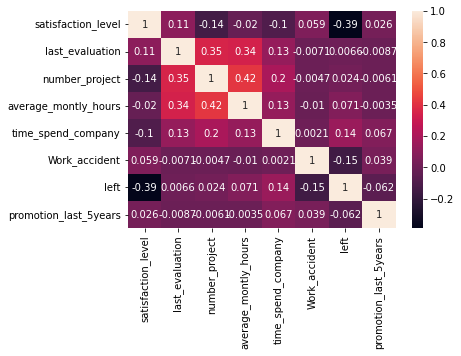

In [4]:
import seaborn as sns
df_heat = df.corr()
sns.heatmap(df_heat, annot=True)

In [5]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [6]:
df_left = df[df.left == 1]
df_left.sample(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
14230,0.76,0.89,5,262,5,0,1,0,sales,low
1503,0.40,0.46,2,155,3,0,1,0,support,medium
12347,0.11,0.80,6,282,4,0,1,0,technical,medium
12419,0.82,0.85,4,223,5,0,1,0,technical,medium
162,0.45,0.51,2,147,3,0,1,0,sales,low


In [7]:
df_left.shape

(3571, 10)

In [8]:
df_not = df[df.left == 0 ]
df_not.sample(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
13118,0.18,0.90,4,282,4,0,0,0,product_mng,medium
10162,0.67,0.76,2,210,2,0,0,0,sales,medium
2502,0.63,0.61,6,118,2,0,0,0,IT,low
8108,0.67,0.83,5,269,2,0,0,0,sales,medium
2869,0.99,0.56,3,193,3,1,0,0,technical,medium


In [9]:
df_not.shape

(11428, 10)

In [10]:
# Observation = Number of Employees left is more than number of employees working

In [11]:
df.groupby(['left']).mean() # 0 = working , 1 = left

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


# Observations: 
    * Satisfaction level is low for left
    * Avg.monthly working hours are high for left
    * promotion for last 5 years are very low for left 

In [12]:
df_left['salary'].value_counts()

low       2172
medium    1317
high        82
Name: salary, dtype: int64

In [13]:
df_not['salary'].value_counts()

low       5144
medium    5129
high      1155
Name: salary, dtype: int64

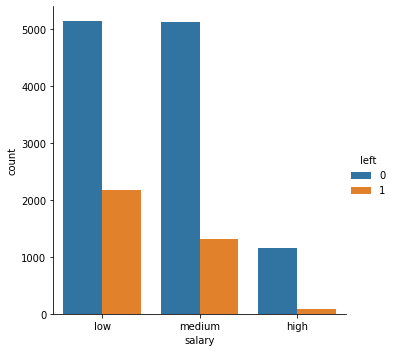

In [14]:
sns.catplot(x ='salary' ,hue='left',kind="count" , data=df)

# Observation:
    Comparing with employees working and left the company
    we can find out that employees with high salaries are likely to not leave the company

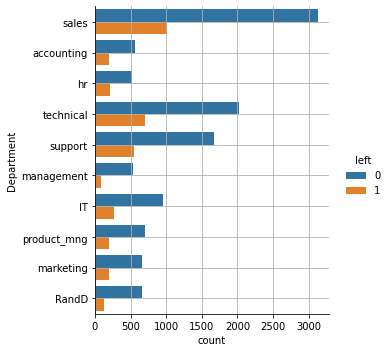

In [15]:
import matplotlib.pyplot as plt
sns.catplot(y='Department', hue='left', kind="count",margin_titles=True, data=df)
plt.grid()

# Observation :
    * sales,technical and support departments shows the highest number of people left count ranging 500 to 1000
    * Independent variables : Satisfaction Level 
                              Average Monthly Hours
                              Promotion Last 5 Years
                              Salary

In [16]:
df_new = df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
df_new.sample(5)

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
5459,0.66,228,0,low
9027,0.69,219,0,low
7727,0.61,149,0,medium
6617,0.68,197,0,low
13623,0.50,258,0,medium


In [17]:
df_new_salary = pd.get_dummies(df_new.salary, prefix='salary')

In [18]:
df_new_dummy = pd.concat([df_new,df_new_salary],axis='columns')

In [19]:
df_new_dummy.sample(5)

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,salary_high,salary_low,salary_medium
3103,0.99,208,0,medium,0,0,1
4707,0.49,249,0,medium,0,0,1
4625,0.78,260,0,medium,0,0,1
12194,0.89,275,0,medium,0,0,1
9363,0.77,226,0,low,0,1,0


In [20]:
df_new_dummy.drop('salary',axis='columns',inplace=True)

In [21]:
df_new_dummy.sample(5)

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
9182,0.76,252,0,0,1,0
269,0.38,139,0,0,0,1
5177,0.88,267,0,0,1,0
8051,0.74,241,0,0,1,0
4506,0.74,135,1,0,0,1


# Model Bulding

In [22]:
X = df_new_dummy
y = df.left

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y ,test_size=0.2)

In [24]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [25]:
lr.fit(X_train,y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [26]:
lr.predict(X_test)

array([0, 0, 0, ..., 0, 1, 0])

In [27]:
lr.score(X_test,y_test)

0.7776666666666666